<a href="https://colab.research.google.com/github/santyxd3000/MachineLearning-Workshop4/blob/main/Workshop4_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TAREA 4 - MACHINE LEARNING

Santiago Pardo - 202013025


Fernando Álvarez - 202014988


In [1]:
from google.colab import files
uploaded = files.upload()

Saving water_potability.csv to water_potability.csv


In [46]:
import io
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
import sklearn.metrics as skm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt



El objetivo de este taller es resolver el problema de clasificación de potabilidad de agua usando los datos adjuntos. Divida apropiadamente los datos en conjuntos de entrenamiento y prueba. A su vez, parte de los datos de entrenamiento se deben utilizar en los procedimientos de selección de modelo

In [3]:
df = pd.read_csv(io.BytesIO(uploaded['water_potability.csv']))
df = df.fillna(df.mean())

In [4]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [5]:
#Dividir los datos en x y y (y son las etiquetas)
x_data = df.drop(columns=['Potability'],axis=1)
y_data = df[['Potability']]
#Escalar los datos con StandardScaler
scaler = StandardScaler()
x_scaled_data = scaler.fit_transform(x_data)

In [6]:
#Dividir datos de entrenamiento - 0.8 de entrenamiento, 0.2 de prueba
x_train, x_test, y_train, y_test = train_test_split(x_scaled_data, y_data, train_size=0.8, test_size=0.2)
y_train = np.ravel(np.array(y_train))
y_test = np.ravel(np.array(y_test))

## **DESARROLLO DE MODELOS**

### *Kernel Polinomial*

Resuelva el problema utilizando un SVM con un kernel polinomial. Sintonice apropiadamente los parámetros del kernel y la constante C.

En primer lugar, se encontró la dimensión óptima del kernel polinomial, asumiendo el C predeterminado de la librería SVC de sklearn(C=1), se utilizó la librería GridSearchCV para realizar una búsqueda de grilla para los grados del kernel polinomial.

Para escoger los grados de la búsqueda de grilla, se escogieron los rangos de 1 a 10, asumiendo que 9 podría ser un valor máximo posible de kernel debido a la cantidad de descriptores que tienen los datos de entrenamiento, sin embargo se probó hasta 10 para observar si se reflejaba algún cambio si se ponían más dimensiones del kernel que descriptores.

Por último, en la búsqueda de grilla se especificó un valor de 5 en el atributo cv, lo cual significa que se utiliza una validación cruzada de 5 pliegues, y esto ayuda a obtener una estimación más robusta del rendimiento del modelo

In [29]:
svm_poly_dimension = SVC(kernel='poly',random_state=42)
param_grid = {'degree': np.arange(1, 10)}
grid_search_d = GridSearchCV(svm_poly_dimension, param_grid, cv=5, scoring='accuracy')
grid_search_d.fit(x_train,y_train)
best_degree = grid_search_d.best_params_['degree']

best_svm_poly_dimension = SVC(kernel='poly', degree=best_degree)
best_svm_poly_dimension.fit(x_train, y_train)

y_pred = best_svm_poly_dimension.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

In [30]:
print(f"La mejor dimensión del kernel polinomial para este problema es de {best_degree} con un accuracy de {accuracy}")

La mejor dimensión del kernel polinomial para este problema es de 2 con un accuracy de 0.6585365853658537


Con la dimensión apropiada ya encontrada, ahora se procedió a encontrar el valor apropiado de C, en el cual se utilizó la misma búsqueda de grilla que el que se utilizó para encontrar la dimensión y para los valores de C, se utilizaron varias potencias de 10, debido a que el algoritmo de SVM es sensible a la escala de los hiperparámetros, de tal modo que se permita explorar un rango que contenga valores pequeños y valores grandes. Se escogío una dimensión de 4 con base a la búsqueda de grilla anterior

In [31]:
svm_c = SVC(kernel='poly', degree=best_degree,random_state=42)
param_grid = {'C': [0.1, 1, 10, 100, 1000]}
grid_search_c = GridSearchCV(svm_c, param_grid, cv=5, scoring='accuracy')
grid_search_c.fit(x_train,y_train)
best_c = grid_search_c.best_params_['C']

In [32]:
best_svm_poly_c = SVC(kernel='poly', degree=best_degree, C=best_c,random_state=42)
best_svm_poly_c.fit(x_train, y_train)
y_pred_poly = best_svm_poly_c.predict(x_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)

In [33]:
print(f"El mejor valor de C es de {best_c}, y el accuracy obtenido es de {accuracy_poly}")

El mejor valor de C es de 1000, y el accuracy obtenido es de 0.6585365853658537


Con un valor óptimo de C y de la dimensión, es este modelo el que pasará a ser evaluado posteriormente.

### *Kernel Gaussiano*

Resuelva el problema utilizando un SVM con un kernel gaussiano. Sintonice apropiadamente los parámetros del kernel y la constante C.


En este kernel gaussiano, para encontrar el valor de $γ$ apropiado, se utilizó la misma búsqueda de grilla ue se hizo para encontrar ambos parámetros del kernel polinomial, por lo cual se utilizaron nuevamente valores de potencias de 10, debido a que se quería un rango en el cual se pudieran probar valores pequeños y grandes y las potencias de 10 son apropiados para probar dicho rango

In [34]:
svm_rbf_gamma = SVC(kernel='rbf',random_state=42)
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_gamma = GridSearchCV(svm_rbf_gamma, param_grid, cv=5, scoring='accuracy')
grid_search_gamma.fit(x_train, y_train)
best_gamma = grid_search_gamma.best_params_['gamma']
best_svm_rbf_gamma = SVC(kernel='rbf', gamma=best_gamma)
best_svm_rbf_gamma.fit(x_train,y_train)
y_pred_gamma = best_svm_rbf_gamma.predict(x_test)
accuracy_gamma = accuracy_score(y_test, y_pred_gamma)

In [35]:
print(f"El mejor valor de gamma es de {best_gamma} con un accuracy de {accuracy_gamma}")

El mejor valor de gamma es de 0.1 con un accuracy de 0.6554878048780488


Con el valor de $γ$ apropiado ya encontrado, ahora se procedió a encontrar el valor apropiado de C, en el cual se utilizó la misma búsqueda de grilla que el que se utilizó para encontrar el $γ$ se utilizó el mismo razonamiento para las potencias de 10 en el rango C que se ha utilizando tanto en el kernel polinomial como en el valor de $γ$ del kernel gaussiano. Se utilizó el $γ$ de 0.1, encontrado en el punto anterior

In [36]:
svm_rbf_c = SVC(kernel='rbf', gamma=0.1,random_state=42)
param_grid = {'C': [0.1, 1, 10, 100, 1000]}
grid_search_rbf_c = GridSearchCV(svm_rbf_c, param_grid, cv=5, scoring='accuracy')
grid_search_rbf_c.fit(x_train,y_train)
best_c_rbf = grid_search_rbf_c.best_params_['C']
best_svm_rbf_c = SVC(kernel='rbf', gamma=0.1, C=best_c_rbf)
best_svm_rbf_c.fit(x_train, y_train)
y_pred_rbf = best_svm_rbf_c.predict(x_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

In [37]:
print(f"El mejor valor de C es de {best_c_rbf}, y el accuracy obtenido es de {accuracy_rbf}")

El mejor valor de C es de 1, y el accuracy obtenido es de 0.6554878048780488


Con el valor de C encontrado, esta predicción se utilizará para evaluar el mejor modelo y compararse con el gaussiano

### **EVALUACIÓN DE MODELOS**

Evalúe sus dos modelos resultantes en los datos de prueba con métricas apropiadas y compare su desempeño.


#### Matriz de Confusión y sus Respectivos Valores

Se hizo un cálculo de valores true positive, true negatives, false positives, false negatives y luego se reflejó gráficamente mediante la matriz de confusión

Para el modelo de kernel polinomial

In [48]:
def compute_tp_tn_fn_fp(y_act, y_pred):
    tp = sum((y_act == 1) & (y_pred == 1))
    tn = sum((y_act == 0) & (y_pred == 0))
    fn = sum((y_act == 1) & (y_pred == 0))
    fp = sum((y_act == 0) & (y_pred == 1))
    return tp, tn, fp, fn


tp_pol, tn_pol, fp_pol, fn_pol = compute_tp_tn_fn_fp(y_pred_poly,y_test)
print("Número de True Postives: "+str(tp_pol))
print("Número de True Negatives: "+str(tn_pol))
print("Número de False Positives: "+str(fp_pol))
print("Número de False Negatives: "+str(fn_pol))

Número de True Postives: 52
Número de True Negatives: 380
Número de False Positives: 193
Número de False Negatives: 31


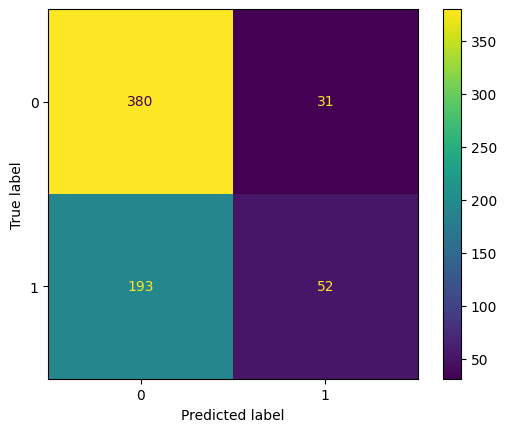

In [49]:
cm = confusion_matrix(y_test, y_pred_poly, labels=best_svm_poly_c.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_svm_poly_c.classes_)
disp.plot()
plt.show()

Para el modelo de kernel gaussiano

In [52]:
tp_rbf, tn_rbf, fp_rbf, fn_rbf = compute_tp_tn_fn_fp(y_pred_rbf,y_test)
print("Número de True Postives: "+str(tp_rbf))
print("Número de True Negatives: "+str(tn_rbf))
print("Número de False Positives: "+str(fp_rbf))
print("Número de False Negatives: "+str(fn_rbf))

Número de True Postives: 59
Número de True Negatives: 371
Número de False Positives: 186
Número de False Negatives: 40


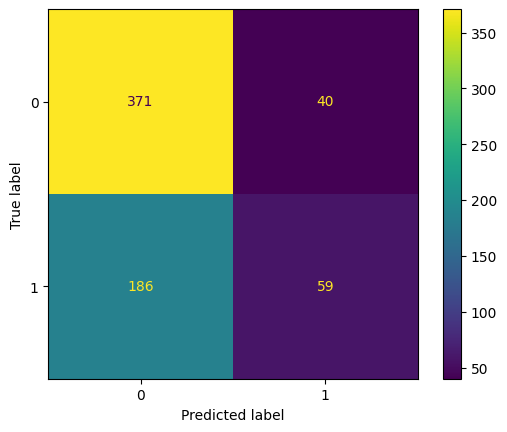

In [53]:
cm = confusion_matrix(y_test, y_pred_rbf, labels=best_svm_poly_c.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=best_svm_rbf_c.classes_)
disp.plot()
plt.show()

#### Recall

$$ Recall = \frac{TP}{TP+FN} $$

In [54]:
recall_pol = skm.recall_score(y_test,y_pred_poly)
print(f"El valor del TP Rate/ Recall/ Sensitividad en el Modelo con Kernel Polinomial es de {recall_pol}")

recall_pol = skm.recall_score(y_test,y_pred_rbf)
print(f"El valor del TP Rate/ Recall/ Sensitividad en el Modelo con Kernel Gaussiano es de {recall_pol}")



El valor del TP Rate/ Recall/ Sensitividad en el Modelo con Kernel Polinomial es de 0.21224489795918366
El valor del TP Rate/ Recall/ Sensitividad en el Modelo con Kernel Gaussiano es de 0.24081632653061225


#### TN Rate / Especficidad


$$TN Rate = \frac{TN}{TN + FP}$$

In [56]:
def specificity(tn,fp):
    return tn/(tn+fp)

specificity_pol = specificity(tn_pol,fp_pol)
specificity_rbf = specificity(tn_rbf,fp_rbf)

print(f"El valor del TN Rate/ Especificidad en el Modelo con Kernel Polinomial es de {specificity_pol}")
print(f"El valor del TN Rate/ Especificidad en el Modelo con Kernel Gaussiano es de {specificity_rbf}")

El valor del TN Rate/ Especificidad en el Modelo con Kernel Polinomial es de 0.6631762652705061
El valor del TN Rate/ Especificidad en el Modelo con Kernel Gaussiano es de 0.6660682226211849


#### Precision

$$Precision = \frac{TP}{TP+FP}$$

In [59]:
precision_pol = skm.precision_score(y_test,y_pred_poly)
precision_rbf = skm.precision_score(y_test,y_pred_rbf)

print(f"El valor del la precisión en el Modelo con Kernel Polinomial es de {precision_pol}")
print(f"El valor del la precisión en el Modelo con Kernel Gaussiano es de {precision_rbf}")

El valor del la precisión en el Modelo con Kernel Polinomial es de 0.6265060240963856
El valor del la precisión en el Modelo con Kernel Gaussiano es de 0.5959595959595959


#### F1-Score

$$F1score = \frac{2*precision*recall}{precision*recall}$$

In [61]:
f1score_pol = skm.f1_score(y_test,y_pred_poly)
f1score_rbf = skm.f1_score(y_test,y_pred_rbf)

print(f"El valor del f1_score en el Modelo con Kernel Polinomial es de {f1score_pol}")
print(f"El valor del f1_score en el Modelo con Kernel Gaussiano es de {f1score_rbf}")

El valor del f1_score en el Modelo con Kernel Polinomial es de 0.3170731707317073
El valor del f1_score en el Modelo con Kernel Gaussiano es de 0.3430232558139535


#### Accuracy Score

$$\frac{TP+TN}{TP+FP+TN+FN}$$

In [64]:
accuracy_pol = accuracy_score(y_test,y_pred_poly)
accuracy_rbf = accuracy_score(y_test,y_pred_rbf)

print(f"El valor de la exacitud (accuracy score) del Modelo con Kernel Polinomial es de {accuracy_pol}")
print(f"El valor de la exacitud (accuracy score) del Modelo con Kernel Gaussiano es de {accuracy_rbf}")

El valor de la exacitud (accuracy score) del Modelo con Kernel Polinomial es de 0.6585365853658537
El valor de la exacitud (accuracy score) del Modelo con Kernel Gaussiano es de 0.6554878048780488


### **ANÁLISIS DE RESULTADOS**

Con base a los resultados obtenidos en la evaluación de ambos modelos, se puede deducir que ambos modelos son similares al realizar la clasificación de los datos, sin embargo, el modelo con el kernel gaussiano tiene ligeramente una ventaja sobre el kernel polinomial al tener una superior sensitividad, especificidad y f1-score.


En el proceso de selección de modelo se utilizó como scoring para escoger los modelos la métrica de exactitud/accuracy dado que representa cuántos datos fueron mejor clasificados con respecto a la totalidad de los datos. Siendo esta medida similar para ambos modelos.

Dentro de los modelos escogidos, con respecto al kernel polinomial se utilizó una dimensión de 2, por lo que una recta resulta ser la mejor dimensión del hiperparámetro del kernel polinomial. Por otro lado, se debió escoger un C grande (1000), lo cual significa que se necesitó un alto control de la penalización para clasificar al valor  iincorrectamente los puntos de entrenamiento.

Por otro lado, con respecto al kernel gaussiano, se debio escoger un valor pequeño de $γ$ dado que el mejor modelo indicó un alcance más amplios al admitir una gran distancia entre puntos, por otro lado, con respecto al valor de C (1), significa que no se requirió un alto control de la penalización para clasificar un valor incorrecto.

### **CONCLUSIONES**

Para realizar un modelo utilizando un kernel polinomial, es necesario utilizar valores importantes como la dimensión del hiperparámetro del kernel y el valor C, los cuales mediante optimización, se pueden encontrar tal que se minimice el error de clasificación y se aumente el margen de clasificación


Para realizar un modelo utilizando un kernel gaussiano, es necesario utilizar valores importantes como el valor de $γ$ y el valor C, los cuales mediante optimización, se pueden encontrar tal que se minimice el error de clasificación y se aumente el margen de clasificación.

Para realizar una optimización de los parámetros mencionados anteriormente, una forma útil de realizarlo computacionalmente es mediante la búsqueda de grilla, la cual hace una prueba del modelo con todas las combinaciones posibles de hiperparámetros hasta encontrar el mejor modelo de acuerdo a un scoring